In [1]:
import requests
import time
from pprint import pprint
from urllib.parse import urlencode
import base64
import webbrowser
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
def pixelate(image, pixelation_amount):
    
    #open image
    im = io.imread(image)
    #new dimensions via list comprehension
    new_dims = [int(np.round(a*pixelation_amount)) for a in im.size]
    #downsample, upsample, and return
    return im.resize(new_dim).resize(im.size, resample = 4)

In [15]:
client_id = "" # The client ID given by the spotify API dashboard
client_secret = "" # The secret/private ID on the spotify API dashboard
redirect_uri = "http://localhost:7777/callback"

auth_headers = {
    "client_id": client_id,
    "response_type": "code",
    "redirect_uri": redirect_uri,
    "scope": "user-read-currently-playing"
}

webbrowser.open("https://accounts.spotify.com/authorize?" + urlencode(auth_headers))

True

In [16]:
code = '' # This is the 'code' given in the URL after running the previous line of code. Copy and paste everything after 'code=' from the URL

In [17]:
encoded_credentials = base64.b64encode(client_id.encode() + b':' + client_secret.encode()).decode("utf-8")

token_headers = { 
    "Authorization": "Basic " + encoded_credentials,
    "Content-Type": "application/x-www-form-urlencoded"
}

token_data = {
    "grant_type": "authorization_code",
    "code": code,
    "redirect_uri": "http://localhost:7777/callback"
}

r = requests.post("https://accounts.spotify.com/api/token", data=token_data, headers=token_headers)

In [18]:
token = r.json()["access_token"]

In [19]:
SPOTIFY_GET_CURRENT_TRACK_URL = 'https://api.spotify.com/v1/me/player/currently-playing' # The current platying song API link
ACCESS_TOKEN = token 

In [21]:
def get_current_track(access_token, pixel=False):
    
    response = requests.get( # Requests to 'get'
        SPOTIFY_GET_CURRENT_TRACK_URL, # From the current playing song API address
        headers={
            "Authorization": f"Bearer {access_token}" # Request token
        }
    )
    json_resp = response.json() # Gets the json info from the request

    track_id = json_resp['item']['id'] # Gets the ID from the song
    track_name = json_resp['item']['name'] # Gets the name from the song
    artists = [artist for artist in json_resp['item']['artists']] # Gets all artists featured on the song

    link = json_resp['item']['external_urls']['spotify'] # Gets the spotify link from the song
    image = json_resp['item']['album']['images'][0]['url'] # Gets the album image art URL from the song

    artist_names = ', '.join([artist['name'] for artist in artists]) # Joins all artists into one string

    current_track_info = { # Creates a dictionary for all current song info
    	"id": track_id,
    	"track_name": track_name,
    	"artists": artist_names,
    	"link": link,
        "image link": image
    }
    img = Image.open(requests.get(image, stream=True).raw) # Opens the image URL
    
    if pixel == True:
        imgSmall = img.resize((64, 64), resample=Image.BILINEAR)
        result = imgSmall.resize(img.size, Image.NEAREST)
        return result

    return img # Returns the image

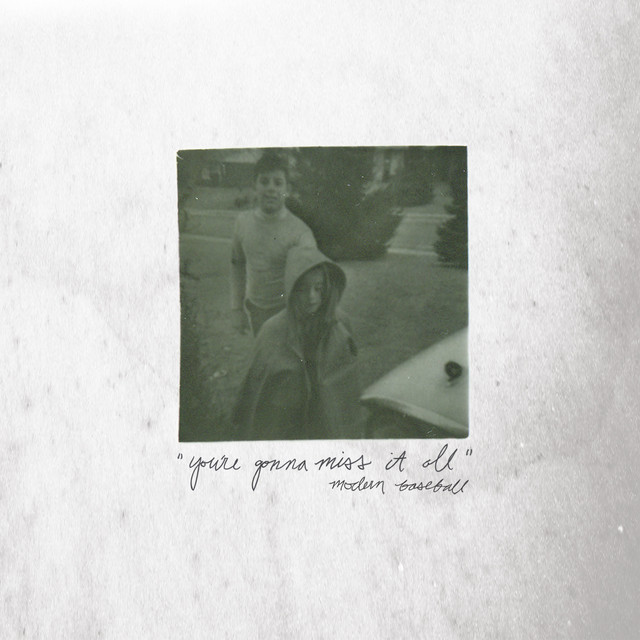

In [25]:
get_current_track(ACCESS_TOKEN, pixel=False)

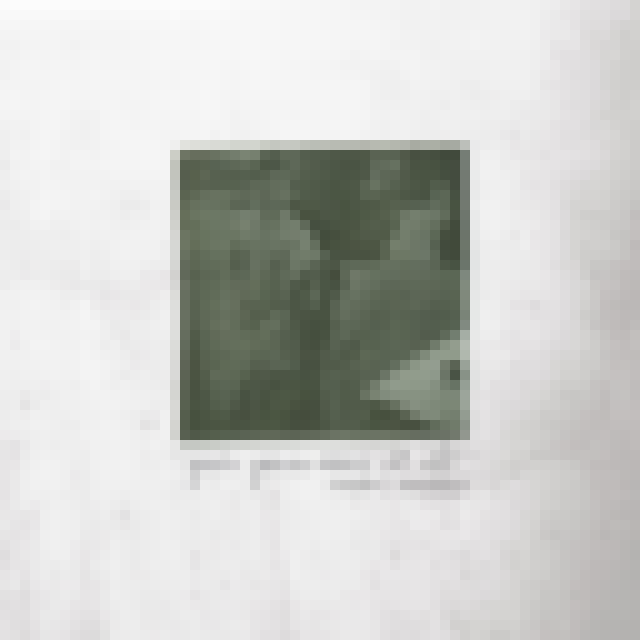

In [26]:
get_current_track(ACCESS_TOKEN, pixel=True)